In [266]:
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
from scipy.integrate import solve_ivp


In [267]:
#Derivative function to work with RK4 loop
def lorenz(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    return np.array([sigma * (y - x), x * (rho - z) - y, (x * y) - (beta * z)])

In [268]:
def rossler(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    return np.array([- y - z, x + a * y, b + z * (x - c)])

In [269]:
def kernelP(x,y,d):
    n = len(x)
    return (np.ones((n,n)) + np.matmul(np.transpose(x),y))**d

In [338]:
def reconstructed(A, r, t):
    B = np.copy(A)
    C = np.copy(A)
    B[B>(-cutoff)]=0
    C[C<cutoff]=0
    temp=C+B
    r1=[r[0],r[1],r[2],r[0]**2,r[1]**2,r[2]**2,r[0]*r[1],r[0]*r[2],r[1]*r[2]]
    temp2 = np.matmul(temp,r1)
    return temp2[0:3]

# Lorenz Attractor

In [315]:
sigma = 10.0 #Variable for dx/dt
rho = 28.0 #Variable for dy/dt
beta = 8/3 #Variable for dz/dt
t = 0 #Starting time
tf = 40 #Ending time
h = 0.01 #Step size for RK4
cutoff = 1e-8

In [316]:
time = np.array([]) #Empty time array to fill for the x-axis
x = np.array([]) #Empty array for x values
y = np.array([]) #Empty array for y values
z = np.array([]) #Empty array for z values
r = np.array([1.0, 1.0, 1.0]) #Initial conditions array
rldot = np.array([1.0, 1.0, 1.0])

In [317]:
while (t <= tf ):
        #Appending values to graph
        time = np.append(time, t)
        z = np.append(z, r[2])
        y = np.append(y, r[1])
        x = np.append(x, r[0])
        #RK4 Step method
        k1 = h*lorenz(r,t)
        k2 = h*lorenz(r+k1/2,t+h/2)
        k3 = h*lorenz(r+k2/2,t+h/2)
        k4 = h*lorenz(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
        #Updating time value with step size
        t = t + h
rl = np.vstack((x,y))
rl = np.vstack((rl,z))

In [318]:
xdot = np.array([])
ydot = np.array([])
zdot = np.array([])
for i in range(len(x)):
    temp = np.array([sigma * (y[i] - x[i]), x[i] * (rho - z[i]) - y[i], (x[i] * y[i]) - (beta * z[i])])
    xdot = np.append(xdot, temp[0])
    ydot = np.append(ydot, temp[1])
    zdot = np.append(zdot, temp[2])
rldot = np.vstack((xdot,ydot))
rldot = np.vstack((rldot,zdot))

## Define Psi(rl) and Psi(rldot)

In [319]:
# Degree one variables
PsiRL = rl
PsiRLd = rldot

# Degree two variables

# x^2, xdot^2
PsiRL = np.vstack((PsiRL, rl[0,:]**2))
PsiRLd = np.vstack((PsiRLd, rldot[0,:]**2))

#y^2, ydot^2
PsiRL = np.vstack((PsiRL, rl[1,:]**2))
PsiRLd = np.vstack((PsiRLd, rldot[1,:]**2))

#z^2, zdot^2
PsiRL = np.vstack((PsiRL, rl[2,:]**2))
PsiRLd = np.vstack((PsiRLd, rldot[2,:]**2))

#x*y, xdot*ydot
PsiRL = np.vstack((PsiRL, rl[0,:]*rl[1,:]))
PsiRLd = np.vstack((PsiRLd, rldot[0,:]*rldot[1,:]))

#x*z, xdot*zdot
PsiRL = np.vstack((PsiRL, rl[0,:]*rl[2,:]))
PsiRLd = np.vstack((PsiRLd, rldot[0,:]*rldot[2,:]))

#y*z, ydot*zdot
PsiRL = np.vstack((PsiRL, rl[2,:]*rl[1,:]))
PsiRLd = np.vstack((PsiRLd, rldot[2,:]*rldot[1,:]))


## DMD Matrix

In [339]:
A = np.matmul(PsiRLd,np.linalg.pinv(PsiRL))
eV, U = np.linalg.eig(A)
idx = eV.argsort()[::-1]   
eV = eV[idx]
U = U[:,idx]
#Leading Modes
print(A[0:3])

[[-1.00000000e+01  1.00000000e+01  4.08006962e-15  5.87030424e-15
  -6.47398801e-15 -1.23295471e-15  4.32986980e-15  7.91033905e-16
   3.36709827e-15]
 [ 2.80000000e+01 -1.00000000e+00 -2.26832442e-14  4.03843625e-15
  -2.96637714e-15 -1.24517909e-15  2.51881849e-15 -1.00000000e+00
  -3.63251096e-15]
 [ 6.21724894e-14 -3.50830476e-14 -2.66666667e+00  1.72084569e-15
  -4.78783679e-16 -2.04697370e-16  1.00000000e+00 -1.39818712e-15
   8.39172482e-16]]


In [340]:
time1 = np.array([]) #Empty time array to fill for the x-axis
x1 = np.array([]) #Empty array for x values
y1 = np.array([]) #Empty array for y values
z1 = np.array([]) #Empty array for z values
r1 = np.array([1.0, 1.0, 1.0]) #Initial conditions array

In [341]:
t=0 
while (t <= tf ):
        #Appending values to graph
        time1 = np.append(time1, t)
        z1 = np.append(z1, r1[2])
        y1 = np.append(y1, r1[1])
        x1 = np.append(x1, r1[0])
        #RK4 Step method
        k1 = h*reconstructed(A, r1, t)
        k2 = h*reconstructed(A, r1+k1/2,t+h/2)
        k3 = h*reconstructed(A, r1+k2/2,t+h/2)
        k4 = h*reconstructed(A, r1+k3,t+h)
        r1 += (k1+2*k2+2*k3+k4)/6
        #Updating time value with step size
        t = t + h

[-2.85993451e-13  2.60000000e+01 -1.66666667e+00]


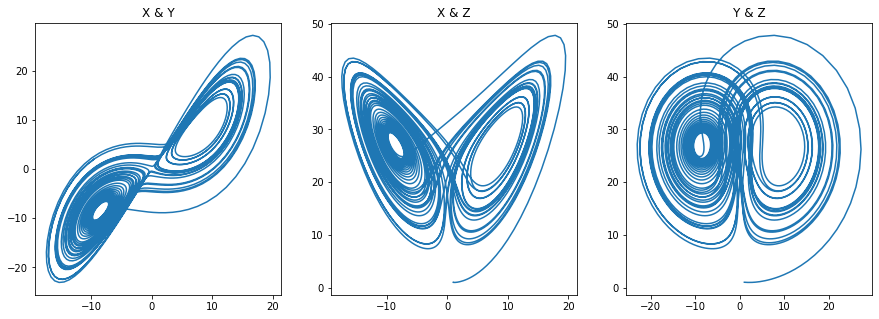

In [323]:
#Multiple graph plotting
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(x, y)
ax1.set_title("X & Y")
ax2.plot(x, z)
ax2.set_title("X & Z")
ax3.plot(y, z)
ax3.set_title("Y & Z")
plt.show()

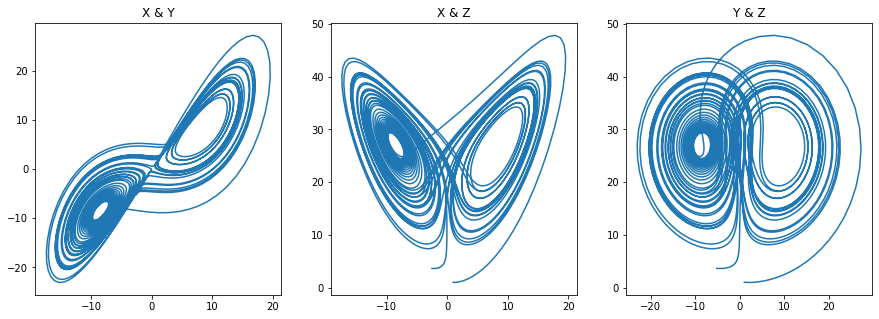

In [342]:
#Multiple graph plotting
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(x1, y1)
ax1.set_title("X & Y")
ax2.plot(x1, z1)
ax2.set_title("X & Z")
ax3.plot(y1, z1)
ax3.set_title("Y & Z")
plt.show()

# Rossler Attractor

In [282]:
a = 0.2
b = 0.2
c = 5.7
t = 0
tf = 100
h = 0.01

In [283]:
time = np.array([]) #Empty time array to fill for the x-axis
x = np.array([]) #Empty array for x values
y = np.array([]) #Empty array for y values
z = np.array([]) #Empty array for z values
r = np.array([1.0, 1.0, 1.0]) #Initial conditions array

In [284]:
while (t <= tf ):
        #Appending values to graph
        time = np.append(time, t)
        z = np.append(z, r[2])
        y = np.append(y, r[1])
        x = np.append(x, r[0])
        #RK4 Step method
        k1 = h*rossler(r,t)
        k2 = h*rossler(r+k1/2,t+h/2)
        k3 = h*rossler(r+k2/2,t+h/2)
        k4 = h*rossler(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
        #Updating time value with step size
        t = t + h
rr = np.vstack((x,y))
rr = np.vstack((rl,z))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4000 and the array at index 1 has size 10000

In [93]:
xdot = np.array([])
ydot = np.array([])
zdot = np.array([])
for i in range(len(x)):
    temp = np.array([- y[i] - z[i], x[i] + a * y[i], b + z[i] * (x[i] - c)])
    xdot = np.append(xdot, temp[0])
    ydot = np.append(ydot, temp[1])
    zdot = np.append(zdot, temp[2])
rrdot = np.vstack((xdot,ydot))
rrdot = np.vstack((rrdot,zdot))

(3, 4000)


In [162]:
# Degree one variables
PsiRR = rr
PsiRRd = rrdot

# Degree two variables

# x^2, xdot^2
PsiRR = np.vstack((PsiRR, rr[0,:]**2))
PsiRRd = np.vstack((PsiRRd, rrdot[0,:]**2))

#y^2, ydot^2
PsiRR = np.vstack((PsiRR, rr[1,:]**2))
PsiRRd = np.vstack((PsiRRd, rrdot[1,:]**2))

#z^2, zdot^2
PsiRR = np.vstack((PsiRR, rr[2,:]**2))
PsiRRd = np.vstack((PsiRRd, rrdot[2,:]**2))

#x*y, xdot*ydot
PsiRR = np.vstack((PsiRR, rr[0,:]*rr[1,:]))
PsiRRd = np.vstack((PsiRRd, rrdot[0,:]*rrdot[1,:]))

#x*z, xdot*zdot
PsiRR = np.vstack((PsiRR, rr[0,:]*rr[2,:]))
PsiRRd = np.vstack((PsiRRd, rrdot[0,:]*rrdot[2,:]))

#y*z, ydot*zdot
PsiRR = np.vstack((PsiRR, rr[2,:]*rr[1,:]))
PsiRRd = np.vstack((PsiRRd, rrdot[2,:]*rldot[1,:]))


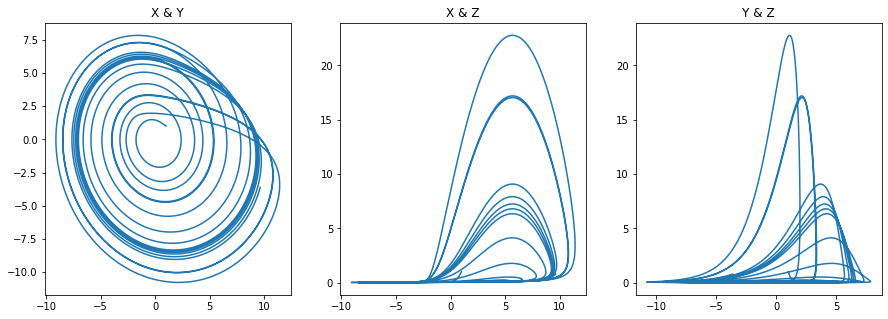

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(x, y)
ax1.set_title("X & Y")
ax2.plot(x, z)
ax2.set_title("X & Z")
ax3.plot(y, z)
ax3.set_title("Y & Z")
plt.show()